## CD1 IVSA FR1 Correct Rate

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

# curr_dir = os.getcwd()
# parent_dir = os.path.join(curr_dir, os.pardir)
# parent_dir = os.path.join(parent_dir, 'scripts')
# sys.path.append(parent_dir)
# print(sys.path[-1])
import intervals as invs
from accuracy import graph_cumulative_acc, instant_acc, time_high_acc, graph_instant_acc, graph_avg_corr_rate
from preprocessing import read_csv_clean, calculate_accuracy_by_row
import paths
from tools import get_bhv_num

ctrl_files = paths.fr1_ivsa_ctrl
exp_files = paths.fr1_ivsa_exp

In [14]:
ctrl_ending_corr = []
exp_ending_corr = []
# ctrl_dict_corr = {}
# exp_dict_corr = {}

def read_and_record(path:str, ending_corr:list, dict_corr:list):
    df = read_csv_clean(path)
    df = calculate_accuracy_by_row(df)
    value = df['Percent_Correct'].tail(1).values[0]
    # key = path
    ending_corr.append(value)
    # dict_corr[key] = value
    return df


def remove_ivsa_bad_data(files:list, control:bool):
    if control:
        bad = ['43', '52', '45']
    else:
        bad = ['46', '49']
        
    for file in files:
        index = file.split('/')[-3][:2]
        if index in bad:
            files.remove(file)
    return files

ctrl_files = remove_ivsa_bad_data(ctrl_files, True)
exp_files = remove_ivsa_bad_data(exp_files, False)

In [15]:
ctrl_list = []
exp_list = []

for path in ctrl_files:
    ctrl_list.append(read_and_record(path, ctrl_ending_corr, None))
for path in exp_files:
    exp_list.append(read_and_record(path, exp_ending_corr, None))

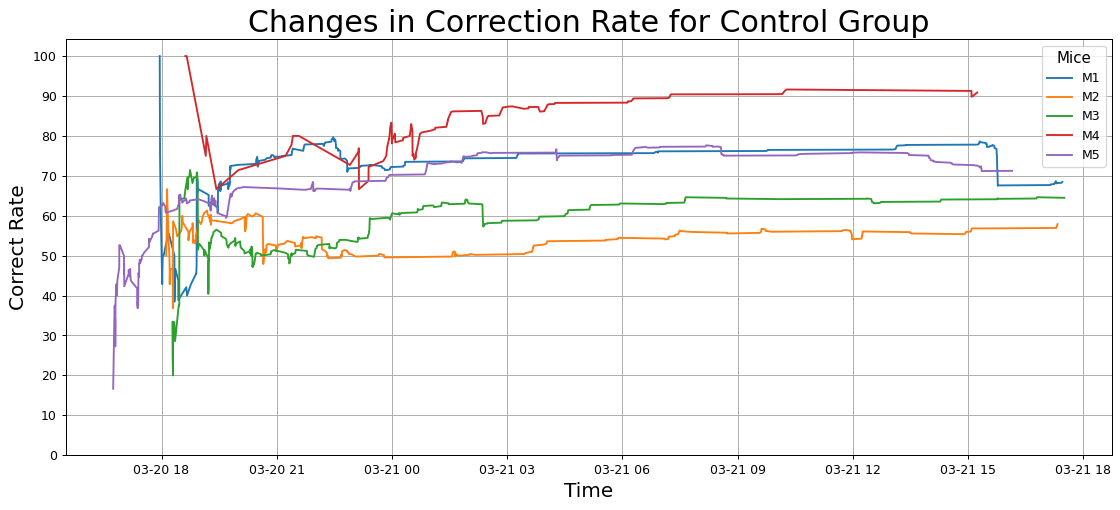

In [16]:
graph_cumulative_acc(ctrl_list, 'Control')

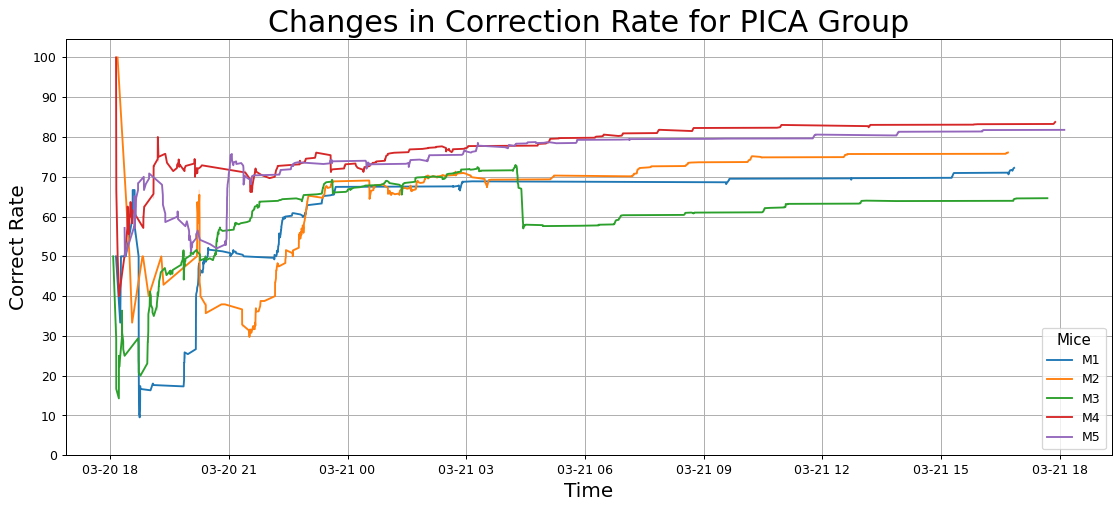

In [17]:
graph_cumulative_acc(exp_list, 'PICA')

In [18]:
ctrl_ending_corr, exp_ending_corr

([68.51851851851852,
  57.909604519774014,
  64.49438202247191,
  90.87719298245615,
  71.25506072874494],
 [72.23796033994334,
  76.09649122807018,
  64.61794019933555,
  83.77483443708608,
  81.7948717948718])

In [19]:
invs.perform_T_test(ctrl_ending_corr ,exp_ending_corr)

P Value is  0.4575174797493371
There is no significant difference between the two groups.


/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/50/FR1/FED000_032024_03.CSV


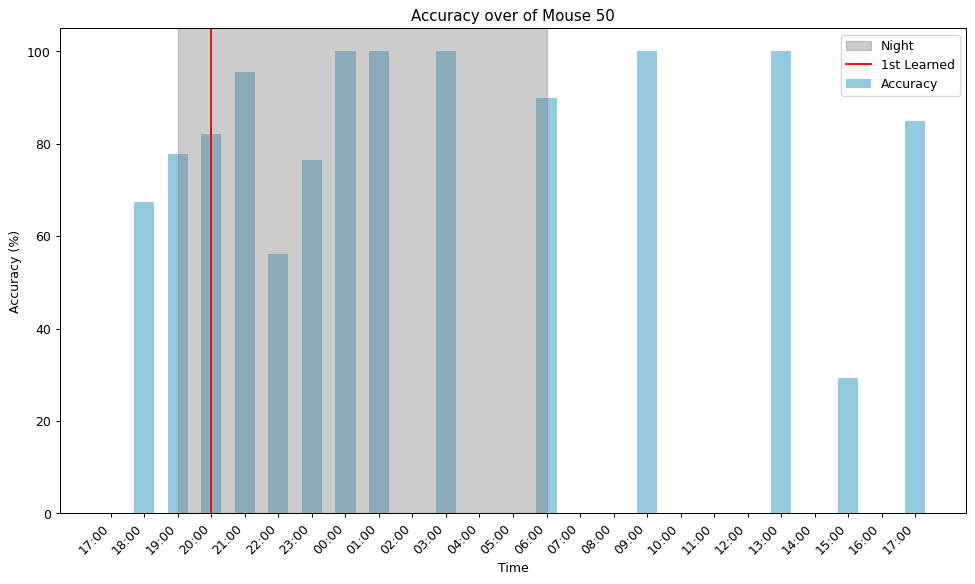

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/41/FR1/FED000_032024_02.CSV


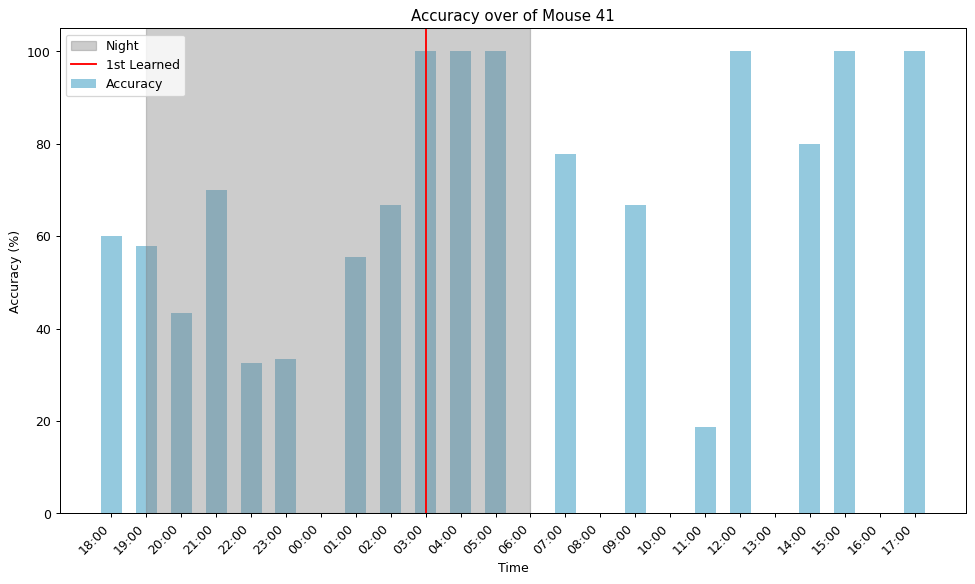

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/53/FR1/FED000_032024_06.CSV


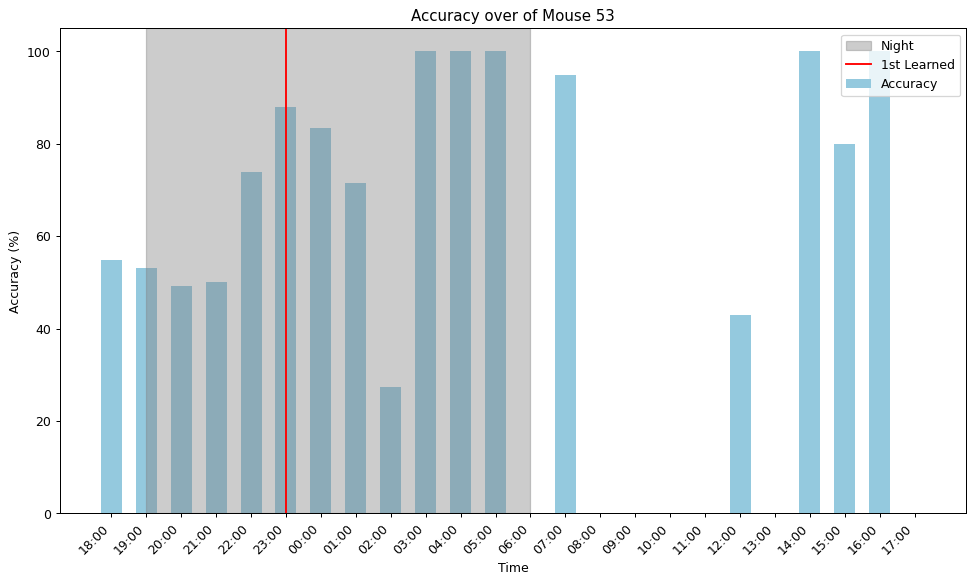

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/44/FR1/FED000_032024_01.CSV


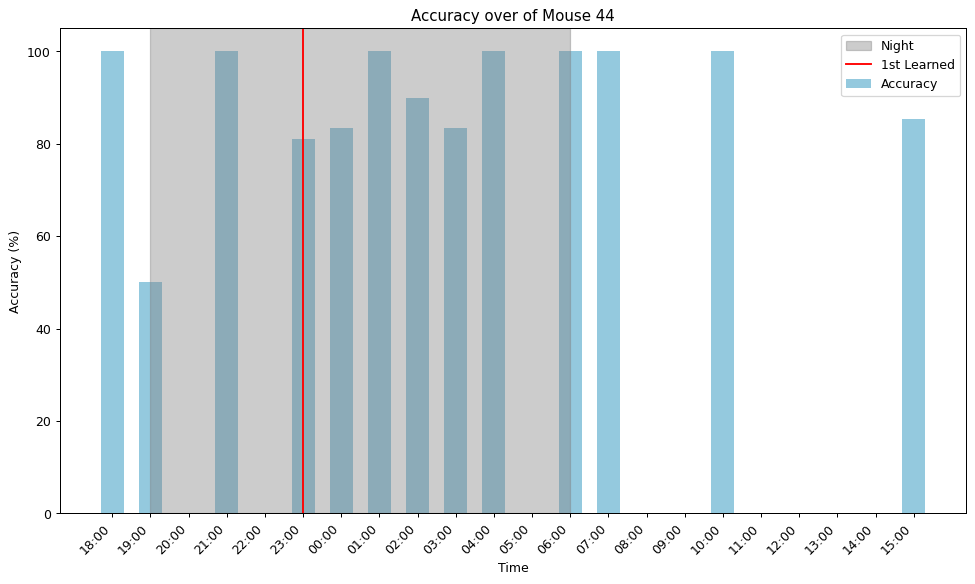

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/51/FR1/FED000_032024_05.CSV


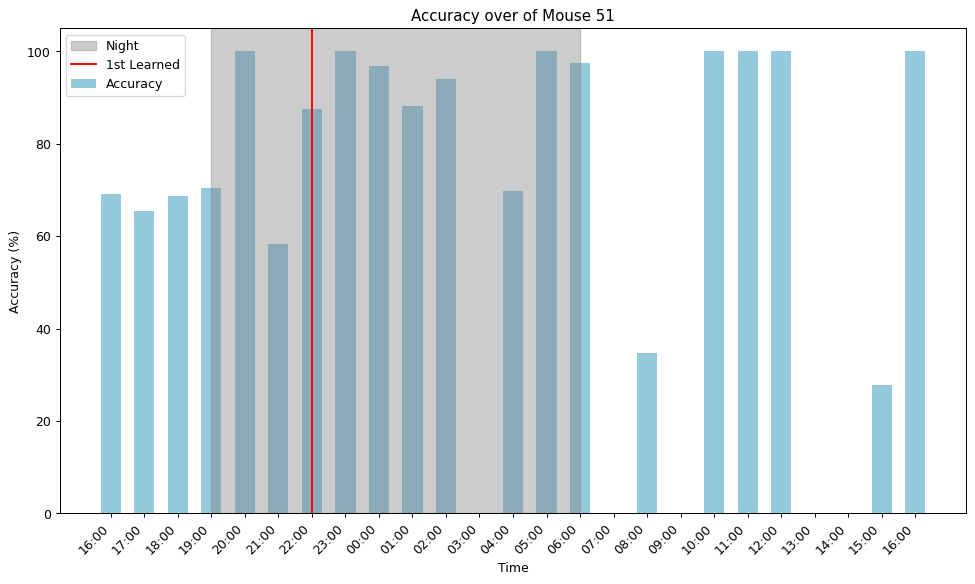

In [20]:
ctrl_times = []

for each in ctrl_files:
    if each.split('/')[-1].startswith('.'): continue
    print(each)
    data = instant_acc(path=each, csv=True)
    stamp, hrs = time_high_acc(data)
    num = get_bhv_num(each)
    ctrl_times.append(hrs)
    graph_instant_acc(data, None, num, stamp)

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/54/FR1/FED000_032024_04.CSV


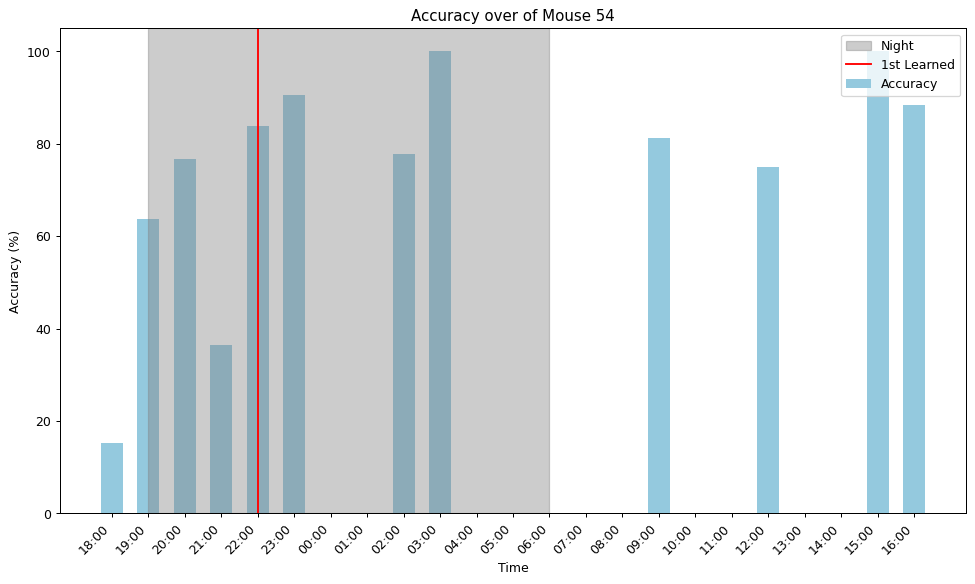

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/55/FR1/FED000_032024_05.CSV


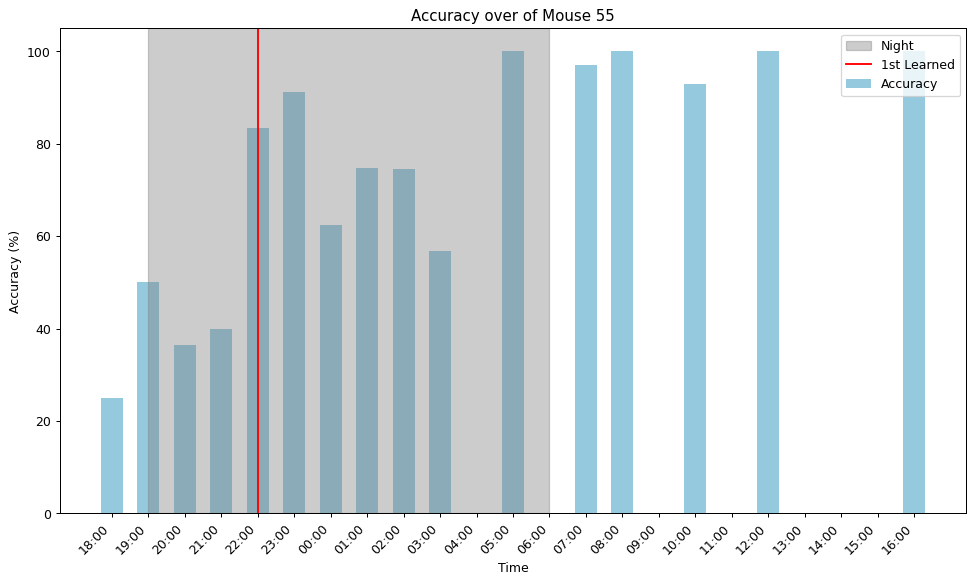

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/47/FR1/FED000_032024_04.CSV


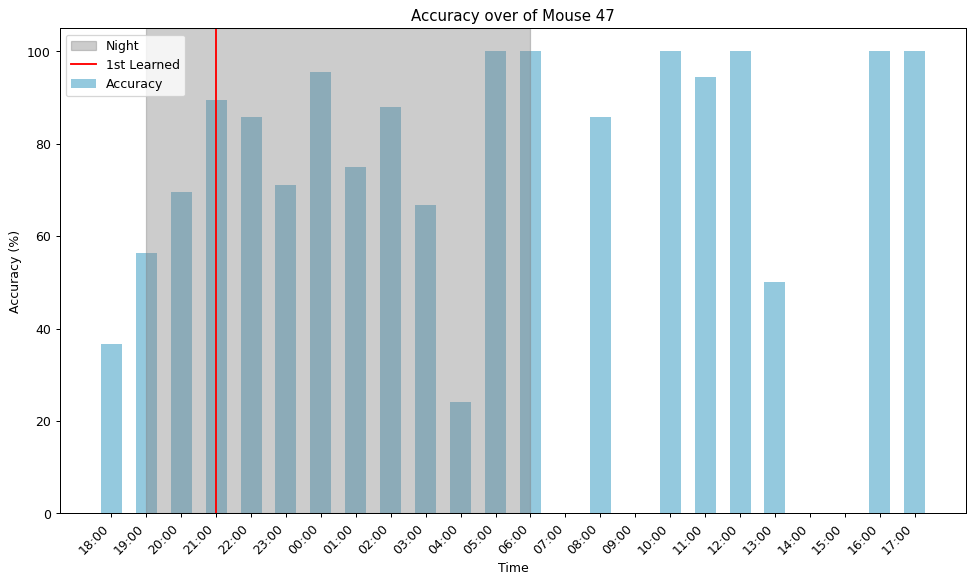

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/57/FR1/FED000_032024_02.CSV


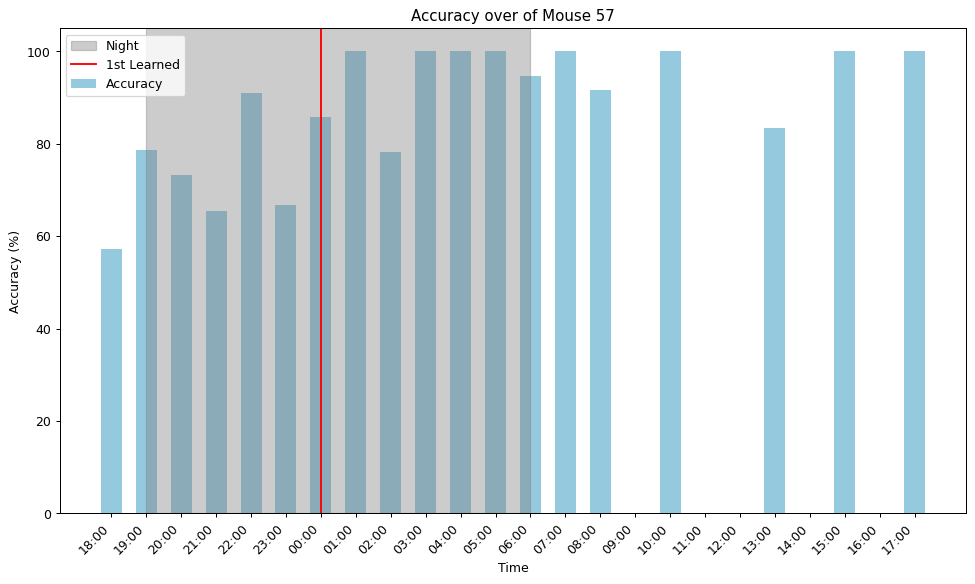

/home/ftlab/Desktop/For_Andy/behavior data integrated/CD1 IVSA/56/FR1/FED000_032024_01.CSV


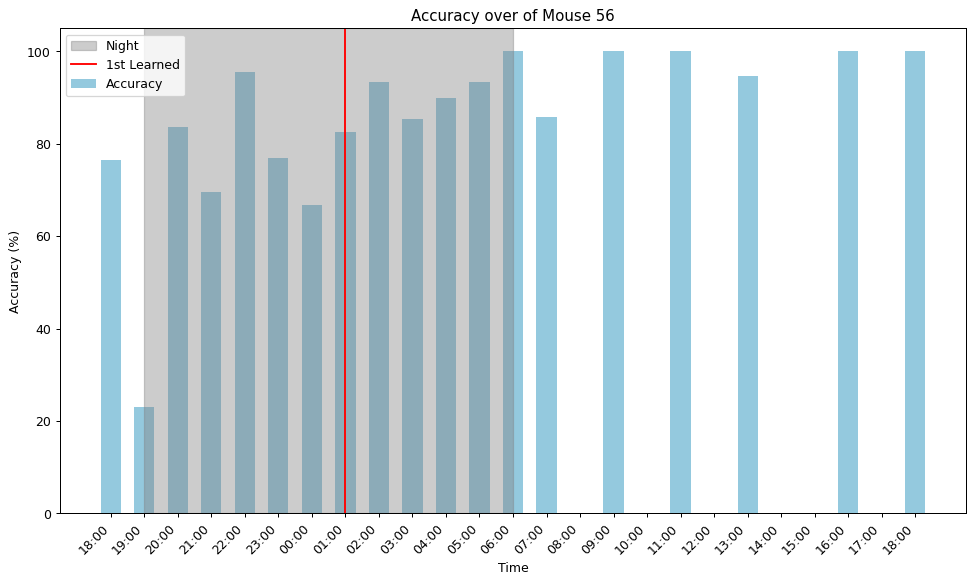

In [21]:
exp_times = []

for each in exp_files:
    if each.split('/')[-1].startswith('.'): continue
    print(each)
    data = instant_acc(path=each, csv=True)
    stamp, hrs = time_high_acc(data)
    num = get_bhv_num(each)
    exp_times.append(hrs)
    graph_instant_acc(data, None, num, stamp)

### Tests

In [22]:
ctrl_times, exp_times

([3.0, 9.0, 5.0, 5.0, 6.0], [4.0, 4.0, 3.0, 6.0, 7.0])

In [23]:
invs.perform_T_test(ctrl_times, exp_times)

P Value is  0.5319488550088816
There is no significant difference between the two groups.
